In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Interactive sessions

More suitable for Jupyter Notebooks

In [2]:
session = tf.InteractiveSession()

# Load MNIST dataset

In [3]:
mnist = input_data.read_data_sets("../data/MNIST", one_hot=True)

Extracting ../data/MNIST/train-images-idx3-ubyte.gz
Extracting ../data/MNIST/train-labels-idx1-ubyte.gz
Extracting ../data/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../data/MNIST/t10k-labels-idx1-ubyte.gz


# Placeholders for inputs and outputs

In [4]:
# Input images
ravel_image_size = 28 * 28
batch_size = None  # Variable batch size
X = tf.placeholder(dtype=tf.float32, shape=[batch_size, ravel_image_size])

In [5]:
# Output labels
n_classes = 10
Y = tf.placeholder(dtype=tf.float32, shape=[batch_size, n_classes])

# Variables for weights and biases

In [6]:
# Initialization to zero. We'll see later better ways to initialize weights and biases
W = tf.Variable(tf.zeros([784, 10], dtype=tf.float32))
b = tf.Variable(tf.zeros([10], dtype=tf.float32))

# Softmax Regression

In [7]:
pred = tf.nn.softmax(tf.matmul(X, W) + b)

In [8]:
loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.05)
train_step = optimizer.minimize(loss)
train_step

<tf.Operation 'GradientDescent' type=NoOp>

# Initialize variables and train with mini batches 

In [10]:
# Initialize variables
session.run(tf.global_variables_initializer())
mini_batch_size = 100
train_losses = []
val_losses = []

In [17]:
# Train
start = time.time()
for i in range(500):
    batch = mnist.train.next_batch(mini_batch_size)
    train_step.run(feed_dict={X: batch[0], Y: batch[1]})
    # Compute losses
    train_losses.append(loss.eval(feed_dict={X: mnist.train.images, Y: mnist.train.labels}))
    val_losses.append(loss.eval(feed_dict={X: mnist.validation.images, Y: mnist.validation.labels}))
end = time.time()
print('Training time: {:.2f} s'.format(end - start))

Training time: 53.24 s


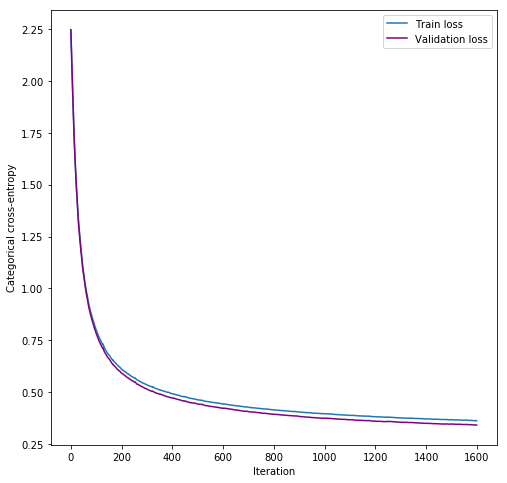

In [18]:
plt.figure(figsize=(8, 8))
plt.plot(train_losses, label='Train loss')
plt.plot(val_losses, label='Validation loss', color='purple')
plt.xlabel('Iteration')
plt.ylabel('Categorical cross-entropy')
plt.legend()

# Test

In [19]:
correct_predictions = tf.equal(tf.arg_max(pred, dimension=1), tf.arg_max(Y, dimension=1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [20]:
acc = accuracy.eval(feed_dict={
    X: mnist.test.images,
    Y: mnist.test.labels
})

print('Test accuracy: {:.2%}'.format(acc))

Test accuracy: 90.79%
